## Baseball performance metrics and Salary analysis 

### Introduction 

For this analysis, I explored baseball data and metrics for hitting and pitching such as Runs Batted In (RBI) and Earned Run Average (ERA). In particular, I was interested in the relationship or lack there of between various performance metrics for batting and pitching and player salaries. I wanted to determine which batting and pitching stats were most strongly correlated with salaries and why that might be so. However, I wanted to go further and examine a player’s change in performance metrics over seasons and how that may be related to the salary he earned. Therefore, the approach I took was to examine a single season of salaries, from 2008, and look at the hitting and pitching data from not only that year, but from the preceding two seasons (2006, 2007) and the following two seasons (2009, 2010). I had several questions about the data that I would seek to answer:
1. Which batting statistic, hits, home runs, or runs batted in, had the highest correlation with player salary?
2. Which pitching statistic, earned run average, wins, or strikeouts, had the highest correlation with pitcher salary?

In [3]:
# loading packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt
import os


In [4]:
# loading data 
df_batting_2010 = pd.read_csv('../data/Batting_2010.csv')
df_pitching_2010 = pd.read_csv('../data/Pitching_2010.csv')
df_salaries_2010 = pd.read_csv('../data/Salaries_2010.csv')

In [5]:
df_salaries_2010.head()

,yearID,teamID,lgID,playerID,salary
0,1959,DET,AL,cashno01,7000.0
1,1980,TOR,AL,stiebda01,55000.0
2,1981,NYA,AL,jacksre01,588000.0
3,1981,TOR,AL,stiebda01,85000.0
4,1982,TOR,AL,stiebda01,250000.0


In [6]:
# summary satistics 
print('The range of the data starts from ', df_batting_2010['yearID'].min(), ' to', df_batting_2010['yearID'].max())


The range of the data starts from  1871  to 2011


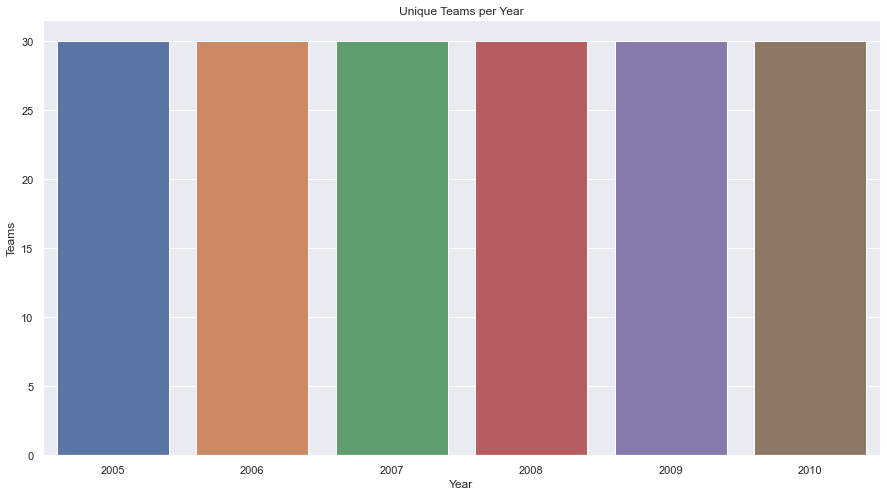

In [13]:
# number of unique teams from 2005 to 2010 
sns.set(rc = {'figure.figsize':(15,8)})
year_team_count_df = df_pitching_2010.groupby(['yearID'])['teamID'].nunique().reset_index()
year_team_count_df = year_team_count_df[(year_team_count_df['yearID'] > 2004) &  (year_team_count_df['yearID'] < 2011)]
plt = sns.barplot(data= year_team_count_df, x = 'yearID', y = 'teamID')
plt = plt.set(xlabel ="Year", ylabel = "Teams", title ='Unique Teams per Year')

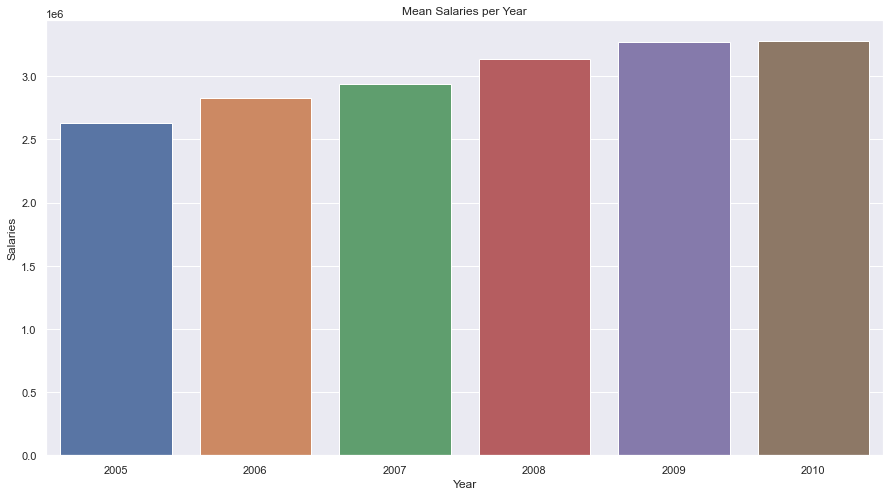

In [14]:
# mean salaries per year between 2005 to 2010 
df_salaries_year_mean_df = df_salaries_2010.groupby(['yearID'])['salary'].mean().reset_index()
df_salaries_year_mean_df = df_salaries_year_mean_df[(df_salaries_year_mean_df['yearID'] > 2004) & (df_salaries_year_mean_df['yearID'] <2011)]
plt = sns.barplot(data= df_salaries_year_mean_df, x = 'yearID', y = 'salary')
plt = plt.set(xlabel ="Year", ylabel = "Salaries", title ='Mean Salaries per Year')


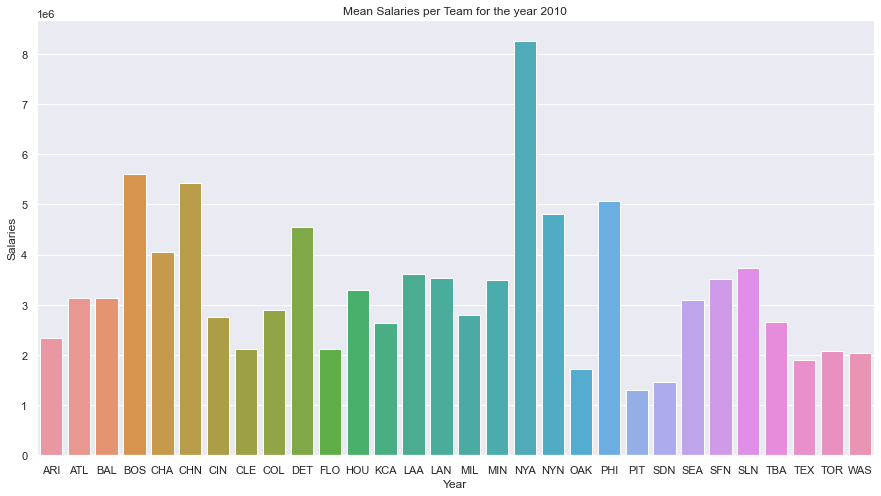

In [19]:
# Avg Salaries by the team in 2010 

df_salaries_mean_2010_df = df_salaries_2010[df_salaries_2010['yearID'] == 2010].reset_index(drop = True)
df_salaries_mean_2010_df = df_salaries_mean_2010_df.groupby(['teamID'])['salary'].mean().reset_index()

plt = sns.barplot(data= df_salaries_mean_2010_df, x = 'teamID', y = 'salary')
plt = plt.set(xlabel ="Year", ylabel = "Salaries", title ='Mean Salaries per Team for the year 2010')



In [17]:
df_salaries_mean_2010_df.head()

,teamID,salary
0,ARI,2.335314e+06
1,ATL,3.126802e+06
2,BAL,3.138942e+06
3,BOS,5.601632e+06
4,CHA,4.058846e+06


In [186]:
df_batting_2010.head(2)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,aardsda01,2006,1,CHN,NL,45,43,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0


In [138]:
df_pitching_2010.head(2)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2004,1,SFN,NL,1,0,11,0,0,...,0.0,0.0,2.0,0.0,61.0,5.0,8,NaN,NaN,NaN
1,aardsda01,2006,1,CHN,NL,3,0,45,0,0,...,0.0,1.0,1.0,0.0,225.0,9.0,25,NaN,NaN,NaN


In [139]:
df_salaries_2010.head(2)

,yearID,teamID,lgID,playerID,salary
0,1959,DET,AL,cashno01,7000.0
1,1980,TOR,AL,stiebda01,55000.0


Text(0.5, 1.0, 'Histogram of Salaries for 2010')

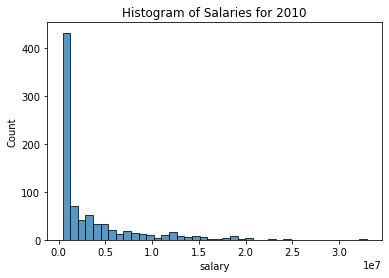

In [140]:
# histogram of sales
salaries_2010 = df_salaries_2010[df_salaries_2010['yearID'] ==2010]
sns.histplot(data=salaries_2010, x = 'salary').set_title('Histogram of Salaries for 2010')

In [141]:
# Batting Analysis 
# H              Hits
# HR             Homeruns
# RBI            Runs Batted In

years_to_examine = [2006, 2007, 2008, 2009, 2010]
batting_years_examined_df = df_batting_2010[['playerID', 'yearID', 'RBI', 'H', 'HR', 'G']]
batting_years_examined_df = batting_years_examined_df[batting_years_examined_df['yearID'].isin(years_to_examine)]

# For pitching, the relevant statistics are: Earned Run Average (ERA), Wins (W), and Stikeouts (SO)
pitching_years_examined_df = df_pitching_2010[['playerID', 'yearID', 'ERA', 'W', 'SO', 'IPouts']]
pitching_years_examined_df = pitching_years_examined_df[pitching_years_examined_df['yearID'].isin(years_to_examine)]
# Examine the data so far.
batting_years_examined_df.tail(2)


,playerID,yearID,RBI,H,HR,G
95162,zumayjo01,2009,0.0,0.0,0.0,29
95163,zumayjo01,2010,0.0,0.0,0.0,31


In [142]:
pitching_years_examined_df.tail(2)

,playerID,yearID,ERA,W,SO,IPouts
41127,zumayjo01,2009,4.94,3,30,93
41128,zumayjo01,2010,2.58,2,34,115


In [145]:
# batting record mean greater than 0
batting_years_examined_rbi_mean_df = batting_years_examined_df.groupby(['playerID'])['RBI'].mean().reset_index()
batting_years_examined_rbi_mean_df = batting_years_examined_rbi_mean_df[batting_years_examined_rbi_mean_df['RBI'] > 0]

batting_years_examined_h_mean_df = batting_years_examined_df.groupby(['playerID'])['H'].mean().reset_index()
batting_years_examined_h_mean_df = batting_years_examined_h_mean_df[batting_years_examined_h_mean_df['H'] > 0]


batting_years_examined_hr_mean_df = batting_years_examined_df.groupby(['playerID'])['HR'].mean().reset_index()
batting_years_examined_hr_mean_df = batting_years_examined_hr_mean_df[batting_years_examined_hr_mean_df['HR'] > 0]


batting_years_examined_g_mean_df = batting_years_examined_df.groupby(['playerID'])['G'].mean().reset_index()
batting_years_examined_g_mean_df = batting_years_examined_g_mean_df[batting_years_examined_g_mean_df['G'] > 0]

In [146]:
# 2010 player salaries sum
df_salaries_filter_2010_df = df_salaries_2010[df_salaries_2010['yearID'] == 2010]
salaries_palyer_2010_sum_df = df_salaries_filter_2010_df.groupby(['playerID'])['salary'].sum().reset_index()

Performance Metric and Salary Analysis

          salary       RBI
salary  1.000000  0.370293
RBI     0.370293  1.000000


<AxesSubplot:xlabel='RBI', ylabel='salary'>

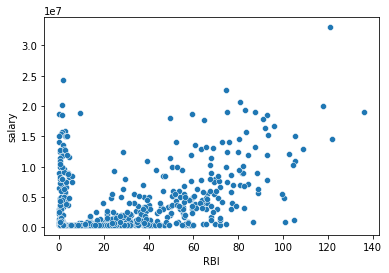

In [175]:
# plot RBI vs Salaries 

plot_rbi_salaries_df = pd.merge(left= salaries_palyer_2010_sum_df, right = batting_years_examined_rbi_mean_df, 
                               on = 'playerID' )


print(plot_rbi_salaries_df.corr())

sns.scatterplot(x='RBI', y='salary', data=plot_rbi_salaries_df)

          salary         H
salary  1.000000  0.315621
H       0.315621  1.000000


<AxesSubplot:xlabel='H', ylabel='salary'>

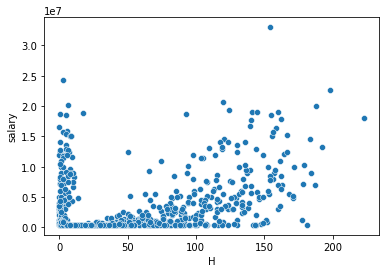

In [177]:
# plot H vs Salaries 

plot_h_salaries_df = pd.merge(left= salaries_palyer_2010_sum_df, right = batting_years_examined_h_mean_df, 
                               on = 'playerID' )

print(plot_h_salaries_df.corr())
sns.scatterplot(x='H', y='salary', data=plot_h_salaries_df)

          salary        HR
salary  1.000000  0.475975
HR      0.475975  1.000000


<AxesSubplot:xlabel='HR', ylabel='salary'>

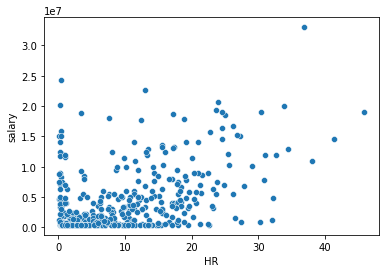

In [178]:
# plot HR vs Salaries 

plot_hr_salaries_df = pd.merge(left= salaries_palyer_2010_sum_df, right = batting_years_examined_hr_mean_df, 
                               on = 'playerID' )

print(plot_hr_salaries_df.corr())
sns.scatterplot(x='HR', y='salary', data=plot_hr_salaries_df)

          salary         G
salary  1.000000  0.325174
G       0.325174  1.000000


<AxesSubplot:xlabel='G', ylabel='salary'>

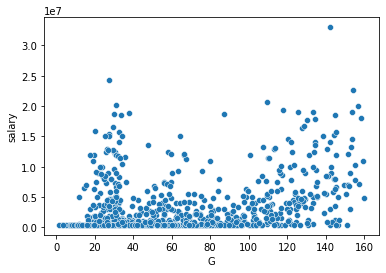

In [179]:
# plot G vs Salaries 

plot_g_salaries_df = pd.merge(left= salaries_palyer_2010_sum_df, right = batting_years_examined_g_mean_df, 
                               on = 'playerID' )

print(plot_g_salaries_df.corr())
sns.scatterplot(x='G', y='salary', data=plot_g_salaries_df)

In [157]:
pitching_years_examined_era_mean_df = pitching_years_examined_df.groupby(['playerID'])['ERA'].mean().reset_index()
pitching_years_examined_era_mean_df = pitching_years_examined_era_mean_df[pitching_years_examined_era_mean_df['ERA'] > 0]



pitching_years_examined_w_mean_df = pitching_years_examined_df.groupby(['playerID'])['W'].mean().reset_index()
pitching_years_examined_w_mean_df = pitching_years_examined_w_mean_df[pitching_years_examined_w_mean_df['W'] > 0]



pitching_years_examined_ipouts_mean_df = pitching_years_examined_df.groupby(['playerID'])['IPouts'].mean().reset_index()
pitching_years_examined_ipouts_mean_df = pitching_years_examined_ipouts_mean_df[pitching_years_examined_ipouts_mean_df['IPouts'] > 0]

          salary       ERA
salary  1.000000 -0.146517
ERA    -0.146517  1.000000


<AxesSubplot:xlabel='ERA', ylabel='salary'>

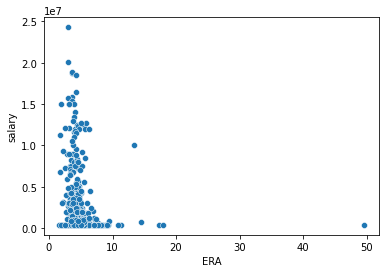

In [180]:
# plot ERA vs Salaries 

plot_era_salaries_df = pd.merge(left= salaries_palyer_2010_sum_df, right = pitching_years_examined_era_mean_df, 
                               on = 'playerID' )

print(plot_era_salaries_df.corr())
sns.scatterplot(x='ERA', y='salary', data=plot_era_salaries_df)

          salary         W
salary  1.000000  0.542426
W       0.542426  1.000000


<AxesSubplot:xlabel='W', ylabel='salary'>

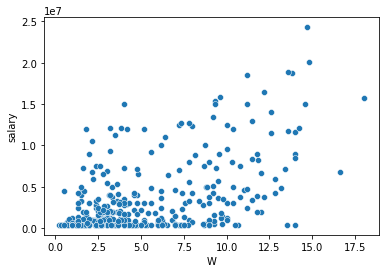

In [181]:
# plot W vs Salaries 

plot_w_salaries_df = pd.merge(left= salaries_palyer_2010_sum_df, right = pitching_years_examined_w_mean_df, 
                               on = 'playerID' )


print(plot_w_salaries_df.corr())
sns.scatterplot(x='W', y='salary', data=plot_w_salaries_df)

          salary        SO
salary  1.000000  0.566045
SO      0.566045  1.000000


<AxesSubplot:xlabel='SO', ylabel='salary'>

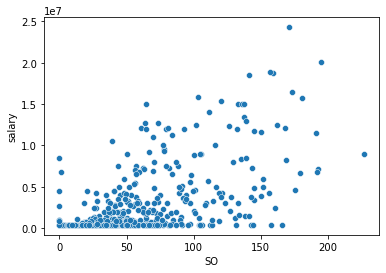

In [182]:
# plot SO vs Salaries 

plot_so_salaries_df = pd.merge(left= salaries_palyer_2010_sum_df, right = pitching_years_examined_so_mean_df, 
                               on = 'playerID' )

print(plot_so_salaries_df.corr())
sns.scatterplot(x='SO', y='salary', data=plot_so_salaries_df)

          salary    IPouts
salary  1.000000  0.541483
IPouts  0.541483  1.000000


<AxesSubplot:xlabel='IPouts', ylabel='salary'>

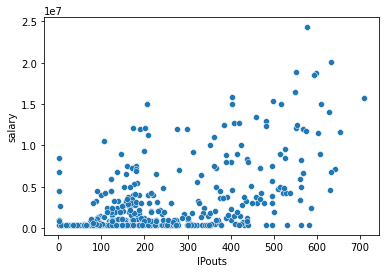

In [183]:
# plot ipouts vs Salaries 

plot_ipouts_salaries_df = pd.merge(left= salaries_palyer_2010_sum_df, right = pitching_years_examined_ipouts_mean_df, 
                               on = 'playerID' )

print(plot_ipouts_salaries_df.corr())
sns.scatterplot(x='IPouts', y='salary', data=plot_ipouts_salaries_df)

# Conclusion

There are several conclusions that can be drawn from this analysis but there are also numerous caveats that must be mentioned that prevent these conclusions from being accepted as fact.

1.When looking at batters from the range 2006–2010, the number of RBIs was the performance metric most highly correlated with salary in 2010.

2.When looking at pitchers from the range 2006–2010, the number of wins was the performance metric most highly correlated with salary in 2010.


In summary, this project demonstrated the entire process of investigating a dataset including: posing questions about a dataset, wrangling the data into a usable format, analyzing the data, and extracting applicable conclusions from the data. 

### Thanks for your assginments and introducing us to new projects. I have gained expertise in using  python and feel much confident performing EDA and data wrangling. Additionally, I also developed a deeper understanding about data visualisation by using Matplotlib and seaborn